In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [34]:
from dataset import load_svhn, random_split_train_val
from gradient_check import check_gradient
from metrics import multiclass_accuracy 
import linear_classifier

In [11]:
def prepare_for_linear_classifier(train_X, test_X):
    train_flat = train_X.reshape(train_X.shape[0], -1).astype(np.float) / 255.0
    test_flat = test_X.reshape(test_X.shape[0], -1).astype(np.float) / 255.0
    
    # Subtract mean
    mean_image = np.mean(train_flat, axis = 0)
    train_flat -= mean_image
    test_flat -= mean_image
    
    # Add another channel with ones as a bias term
    train_flat_with_ones = np.hstack([train_flat, np.ones((train_X.shape[0], 1))])
    test_flat_with_ones = np.hstack([test_flat, np.ones((test_X.shape[0], 1))])    
    return train_flat_with_ones, test_flat_with_ones
    
train_X, train_y, test_X, test_y = load_svhn("data", max_train=10000, max_test=1000)    
train_X, test_X = prepare_for_linear_classifier(train_X, test_X)
# Split train into train and val
train_X, train_y, val_X, val_y = random_split_train_val(train_X, train_y, num_val = 1000)

In [12]:
def square(x):
    return float(x*x), 2*x

check_gradient(square, np.array([3.0]))

def array_sum(x):
    assert x.shape == (2,), x.shape
    return np.sum(x), np.ones_like(x)

check_gradient(array_sum, np.array([3.0, 2.0]))

def array_2d_sum(x):
    assert x.shape == (2,2)
    return np.sum(x), np.ones_like(x)

check_gradient(array_2d_sum, np.array([[3.0, 2.0], [1.0, 0.0]]))

Gradient check passed!
Gradient check passed!
Gradient check passed!


True

In [18]:
probs = linear_classifier.softmax(np.array([-10, 0, 10]))
print(probs)
# Make sure it works for big numbers too!
probs = linear_classifier.softmax(np.array([1000, 0, 0]))
print(probs)
assert np.isclose(probs[0], 1.0)

[2.06106005e-09 4.53978686e-05 9.99954600e-01]
[1. 0. 0.]


In [24]:
probs = linear_classifier.softmax(np.array([-5, 0, 5]))
linear_classifier.cross_entropy_loss(probs, 1)

loss, grad = linear_classifier.softmax_with_cross_entropy(np.array([1, 0, 0]), 1)
check_gradient(lambda x: linear_classifier.softmax_with_cross_entropy(x, 1), np.array([1, 0, 0], np.float))

Gradient check passed!


True

In [26]:
np.random.seed(42)
# Test batch_size = 1
num_classes = 4
batch_size = 1
predictions = np.random.randint(-1, 3, size=(batch_size, num_classes)).astype(np.float)
target_index = np.random.randint(0, num_classes, size=(batch_size, 1)).astype(np.int)
check_gradient(lambda x: linear_classifier.softmax_with_cross_entropy(x, target_index), predictions)

# Test batch_size = 3
num_classes = 4
batch_size = 3
predictions = np.random.randint(-1, 3, size=(batch_size, num_classes)).astype(np.float)
target_index = np.random.randint(0, num_classes, size=(batch_size, 1)).astype(np.int)
check_gradient(lambda x: linear_classifier.softmax_with_cross_entropy(x, target_index), predictions)

# Make sure maximum subtraction for numberic stability is done separately for every sample in the batch
probs = linear_classifier.softmax(np.array([[20,0,0], [1000, 0, 0]]))
assert np.all(np.isclose(probs[:, 0], 1.0))

Gradient check passed!
Gradient check passed!


In [27]:
batch_size = 2
num_classes = 2
num_features = 3
np.random.seed(42)
W = np.random.randint(-1, 3, size=(num_features, num_classes)).astype(np.float)
X = np.random.randint(-1, 3, size=(batch_size, num_features)).astype(np.float)
target_index = np.ones(batch_size, dtype=np.int)

loss, dW = linear_classifier.linear_softmax(X, W, target_index)
check_gradient(lambda w: linear_classifier.linear_softmax(X, w, target_index), W)

Gradient check passed!


True

In [30]:
linear_classifier.l2_regularization(W, 0.01)
check_gradient(lambda w: linear_classifier.l2_regularization(w, 0.01), W)

Gradient check passed!


True

In [31]:
classifier = linear_classifier.LinearSoftmaxClassifier()
loss_history = classifier.fit(train_X, train_y, epochs=10, learning_rate=1e-3, batch_size=300, reg=1e1)

Epoch 0, loss: 898.952293
Epoch 1, loss: 816.194774
Epoch 2, loss: 891.429815
Epoch 3, loss: 814.898675
Epoch 4, loss: 929.844823
Epoch 5, loss: 865.632208
Epoch 6, loss: 931.091506
Epoch 7, loss: 1013.350902
Epoch 8, loss: 914.784839
Epoch 9, loss: 813.284659


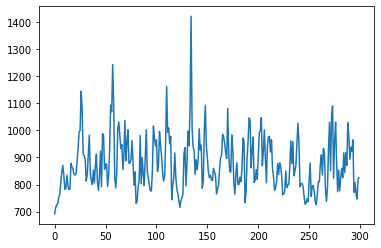

In [32]:
plt.plot(loss_history)

In [36]:
pred = classifier.predict(val_X)
accuracy = multiclass_accuracy(pred, val_y)
print("Accuracy: ", accuracy)

Accuracy:  0.15


In [37]:
classifier.fit(train_X, train_y, epochs=100, learning_rate=1e-3, batch_size=300, reg=1e1)
pred = classifier.predict(val_X)
accuracy = multiclass_accuracy(pred, val_y)
print("Accuracy after training for 100 epochs: ", accuracy)

Epoch 0, loss: 944.903286
Epoch 1, loss: 749.665666
Epoch 2, loss: 998.808337
Epoch 3, loss: 856.117335
Epoch 4, loss: 967.788841
Epoch 5, loss: 776.844931
Epoch 6, loss: 715.805885
Epoch 7, loss: 886.629020
Epoch 8, loss: 825.677675
Epoch 9, loss: 841.382084
Epoch 10, loss: 829.201472
Epoch 11, loss: 869.654826
Epoch 12, loss: 948.022522
Epoch 13, loss: 1005.674605
Epoch 14, loss: 861.247777
Epoch 15, loss: 782.456888
Epoch 16, loss: 902.937625
Epoch 17, loss: 757.488625
Epoch 18, loss: 892.230149
Epoch 19, loss: 822.012115
Epoch 20, loss: 781.078026
Epoch 21, loss: 934.127674
Epoch 22, loss: 789.135894
Epoch 23, loss: 824.718938
Epoch 24, loss: 704.912313
Epoch 25, loss: 915.871542
Epoch 26, loss: 911.931770
Epoch 27, loss: 860.948069
Epoch 28, loss: 978.683723
Epoch 29, loss: 885.967114
Epoch 30, loss: 723.218318
Epoch 31, loss: 1044.913209
Epoch 32, loss: 866.798825
Epoch 33, loss: 843.543127
Epoch 34, loss: 891.900430
Epoch 35, loss: 862.928630
Epoch 36, loss: 806.273173
Epoch 37,

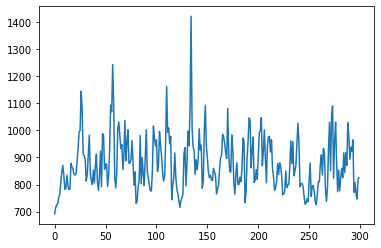

In [38]:
plt.plot(loss_history)

In [39]:
num_epochs = 200
batch_size = 300

learning_rates = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
reg_strengths = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]

best_classifier = None
best_val_accuracy = None

In [ ]:
for learning_rate in learning_rates:
    for reg_strength in reg_strengths:
        classifier = linear_classifier.LinearSoftmaxClassifier()
        classifier.fit(train_X, train_y, batch_size, learning_rate, reg_strength, num_epochs)
        prediction = classifier.predict(val_X)
        accuracy = multiclass_accuracy(prediction, val_y)
        
        if best_val_accuracy is None or best_val_accuracy > accuracy:
            best_val_accuracy = accuracy
            best_classifier = classifier

Epoch 0, loss: 858.576145
Epoch 1, loss: 1281.556504
Epoch 2, loss: 831.769591
Epoch 3, loss: 739.116239
Epoch 4, loss: 751.357995
Epoch 5, loss: 789.084489
Epoch 6, loss: 858.163405
Epoch 7, loss: 904.938064
Epoch 8, loss: 807.247516
Epoch 9, loss: 878.823766
Epoch 10, loss: 798.116299
Epoch 11, loss: 733.641819
Epoch 12, loss: 742.713095
Epoch 13, loss: 925.210596
Epoch 14, loss: 740.060183
Epoch 15, loss: 755.650273
Epoch 16, loss: 684.754583
Epoch 17, loss: 697.592113
Epoch 18, loss: 787.060583
Epoch 19, loss: 897.082174
Epoch 20, loss: 751.138033
Epoch 21, loss: 894.352325
Epoch 22, loss: 661.603710
Epoch 23, loss: 1058.576109
Epoch 24, loss: 730.285149
Epoch 25, loss: 835.445481
Epoch 26, loss: 700.994716
Epoch 27, loss: 788.805199
Epoch 28, loss: 655.878750
Epoch 29, loss: 831.617798
Epoch 30, loss: 846.746096
Epoch 31, loss: 744.753763
Epoch 32, loss: 798.035347
Epoch 33, loss: 706.490837
Epoch 34, loss: 897.782083
Epoch 35, loss: 826.627508
Epoch 36, loss: 725.048467
Epoch 37,